In [5]:
import pandas as pd
import datetime
import yfinance as yf #baixar as cotações de graça!
from matplotlib import pyplot as plt 
import mplcyberpunk #estilo do frafico
import smtplib
from email.message import EmailMessage

In [11]:
ativos =['^BVSP','BRL=X']

hoje = datetime.datetime.now()
um_ano_atras = hoje - datetime.timedelta(days = 365)

dados_mercado = yf.download(ativos, um_ano_atras, hoje) #puxando os dados do ultimo ano

display(dados_mercado)

[*********************100%***********************]  2 of 2 completed


Adj Close             Close              High                 Low  \
               BRL=X     ^BVSP   BRL=X     ^BVSP   BRL=X     ^BVSP     BRL=X   
Date                                                                           
2022-04-11    4.6981  116953.0  4.6981  116953.0  4.7326  118320.0  4.684016   
2022-04-12    4.6936  116147.0  4.6936  116147.0  4.6971  118615.0  4.621500   
2022-04-13    4.6731  116782.0  4.6731  116782.0  4.7023  117329.0  4.653200   
2022-04-14    4.6902  116182.0  4.6902  116182.0  4.7381  116781.0  4.669788   
2022-04-15    4.7010       NaN  4.7010       NaN  4.7100       NaN  4.696500   
...              ...       ...     ...       ...     ...       ...       ...   
2023-04-03    5.0623  101506.0  5.0623  101506.0  5.0755  101916.0  5.036216   
2023-04-04    5.0631  101869.0  5.0631  101869.0  5.0976  103056.0  5.048277   
2023-04-05    5.0707  100978.0  5.0707  100978.0  5.0743  101960.0  5.027504   
2023-04-06    5.0332  100822.0  5.0332  100822.0  5.0789  101628.0  5.028911   
2023-04-07    5.0583       NaN  5.0583       NaN  5.0585       NaN  5.004350   

                        Open           Volume              
               ^BVSP   BRL=X     ^BVSP  BRL=X       ^BVSP  
Date                                                       
2022-04-11  116953.0  4.6980  118320.0      0   9558400.0  
2022-04-12  116054.0  4.6936  116963.0      0  11406800.0  
2022-04-13  116150.0  4.6731  116150.0      0  12070500.0  
2022-04-14  115624.0  4.6902  116781.0      0  10365400.0  
2022-04-15       NaN  4.7010       NaN      0         NaN  
...              ...     ...       ...    ...         ...  
2023-04-03  100651.0  5.0623  101883.0      0  12794800.0  
2023-04-04  101505.0  5.0631  101505.0      0  11695800.0  
2023-04-05   99898.0  5.0707  101869.0      0  13256500.0  
2023-04-06  100443.0  5.0332  100978.0      0   9818500.0  
2023-04-07       NaN  5.0583       NaN      0         NaN  

[260 rows x 12 columns]

In [17]:
dados_fechamento = dados_mercado['Adj Close']
dados_fechamento.columns = ['dolar', 'ibovespa']
dados_fechamento  = dados_fechamento.dropna()#retirar os dados que contem NaN, pois nao podemos trabalhar com dados faltantes
dados_fechamento.head(50) #apresentar os 50 primeiros elementos

,dolar,ibovespa
Date,,
2022-04-11,4.698100,116953.0
2022-04-12,4.693600,116147.0
2022-04-13,4.673100,116782.0
2022-04-14,4.690200,116182.0
2022-04-18,4.700600,115687.0
2022-04-19,4.652000,115057.0
2022-04-20,4.665000,114344.0
2022-04-22,4.620800,111078.0
2022-04-25,4.795200,110685.0


In [19]:
dados_fechamento_mensal = dados_fechamento.resample('M').last() #funcao para fechamento do ultimo mes
#M -> MENSAL, Y -> anual
dados_fechamento_anual = dados_fechamento.resample('Y').last() 
dados_fechamento_anual

,dolar,ibovespa
Date,,
2022-12-31,5.2668,110031.0
2023-12-31,5.0332,100822.0


In [23]:
r_ano = dados_fechamento_anual.pct_change().dropna()
r_mes = dados_fechamento_mensal.pct_change().dropna()
r_dia = dados_fechamento.pct_change().dropna()
r_dia

,dolar,ibovespa
Date,,
2022-04-12,-0.000958,-0.006892
2022-04-13,-0.004368,0.005467
2022-04-14,0.003659,-0.005138
2022-04-18,0.002217,-0.004261
2022-04-19,-0.010339,-0.005446
...,...,...
2023-03-31,-0.008083,-0.017654
2023-04-03,-0.005969,-0.003691
2023-04-04,0.000158,0.003576


In [26]:
#r_dia.loc['2023-04-06', 'dolar'] #digitacao manual do dia que deseja.
r_dia_dolar = r_dia.iloc[-1, 0]
r_dia_ibovespa = r_dia.iloc[-1, 1]

r_mes_dolar = r_mes.iloc[-1, 0]
r_mes_ibovespa = r_mes.iloc[-1, 1]

r_ano_dolar = r_ano.iloc[-1, 0]
r_ano_ibovespa = r_ano.iloc[-1, 1]


r_ano_dolar

-0.044353334637057595

In [27]:
r_dia_dolar = round(r_dia.dolar * 100, 2) #deixando aparentavel com duas casas decimais
r_dia_ibovespa = round(r_dia.dolar * 100, 2)

r_mes_dolar = round(r_mes_dolar * 100, 2)
r_mes_ibovespa = round(r_mes_ibovespa  * 100, 2)

r_ano_dolar = round(r_ano_dolar * 100, 2)
r_ano_ibovespa = round(r_ano_ibovespa  * 100, 2)


r_ano_ibovespa

-8.37

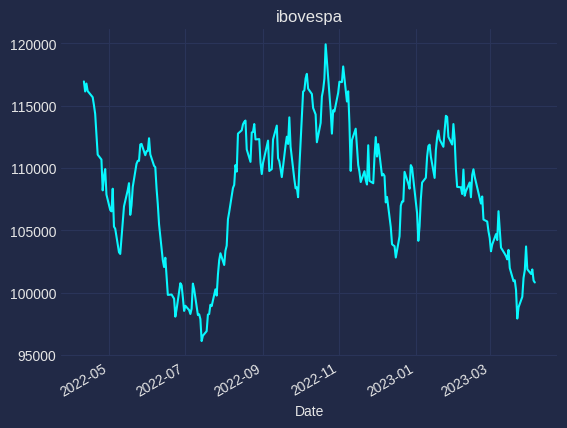

In [31]:
plt.style.use('cyberpunk')
dados_fechamento.plot(y = 'ibovespa', use_index = True, legend = False)
plt.title('ibovespa')
plt.savefig('ibovespa.png', dpi=300) #salvar o grafico, usar o modelo da imagem e a qualidade(nao é exatamente necessario)


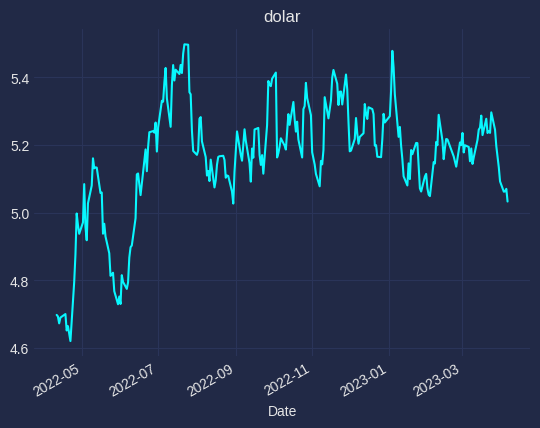

In [30]:
plt.style.use('cyberpunk')
dados_fechamento.plot(y = 'dolar', use_index = True, legend = False)
plt.title('dolar')
plt.savefig('dolar.png', dpi=300) #salvar o grafico, usar o modelo da imagem e a qualidade(nao é exatamente necessario)


In [35]:
import os 
from dotenv import load_dotenv
#para puxar a senha que foi salva em arquivo .env que esta no pc local(e dentro da mesma pasta que o arquivo de programacao)

In [36]:
load_dotenv() #ao retornar true todos os passos de criacao da .env foi feito com sucesso, caso contrario, refaca!

True

In [44]:
email = 'beea.saiito@gmail.com'
senha = os.environ.get('senha') #pacote de gerenciamento de local, ou seja, acessar a variavel do ambiente com o python

In [39]:
msg = EmailMessage()
msg['subject'] = 'enviar e-mail com Python'
msg['from'] = 'beea.saiitoo@gmail.com.br'
msg['to'] = 'breno@varos.com.br'

msg.set_content(f'''
Prezado diretor, segue o relatório diário:

Bolsa:

No ano o Ibovespa está tendo uma rentabilidade de {r_ano_ibovespa}%, 
enquanto no mês a rentabilidade é de {r_mes_ibovespa}%.

No último dia útil, o fechamento do Ibovespa foi de {r_dia_ibovespa}%.

Dólar:

No ano o Dólar está tendo uma rentabilidade de {r_ano_dolar}%, 
enquanto no mês a rentabilidade é de {r_mes_dolar}%.

No último dia útil, o fechamento do Dólar foi de {r_dia_dolar}%.


Abs,

O melhor estagiário do mundo
''')

In [41]:
with open('dolar.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='dolar.png')
    
    
with open('ibovespa.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application', subtype='png', filename='ibovespa.png')

In [45]:
with smtplib.SMTP_SSL('smtp.gmail.com', 465) as smtp:
    smtp.login(email, senha)
    smtp.send_message(msg)